In [1]:
# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

require(data.table)
my_data <- as.data.frame(fread("../changeo10x/vac_heavy_germ-pass.tsv"))

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
# Collapse clonal groups into single sequences
clones <- collapseClones(my_data, cloneColumn="clone_id", 
                         sequenceColumn="sequence_alignment", 
                         germlineColumn="germline_alignment_d_mask", 
                         regionDefinition=IMGT_V, 
                         method="thresholdedFreq", minimumFrequency=0.6,
                         includeAmbiguous=FALSE, breakTiesStochastic=FALSE, 
                         nproc=1)

In [3]:
# Count observed mutations and append mu_count columns to the output
observed <- observedMutations(clones, 
                              sequenceColumn="clonal_sequence",
                              germlineColumn="clonal_germline",
                              regionDefinition=IMGT_V, nproc=1)
# Count expected mutations and append mu_exptected columns to the output
expected <- expectedMutations(observed, 
                              sequenceColumn="clonal_sequence",
                              germlineColumn="clonal_germline",
                              targetingModel=HH_S5F,
                              regionDefinition=IMGT_V, nproc=1)

In [4]:
# Calculate selection scores using the output from expectedMutations
baseline_focused <- calcBaseline(expected, testStatistic="focused", 
                         regionDefinition=IMGT_V, nproc=1)

calcBaseline will use existing observed and expected mutations, in the fields: mu_count_cdr_r, mu_count_cdr_s, mu_count_fwr_r, mu_count_fwr_s and mu_expected_cdr_r, mu_expected_cdr_s, mu_expected_fwr_r, mu_expected_fwr_s



Calculating BASELINe probability density functions...


In [6]:
testBaseline(baseline_focused)

ERROR: Error in (function(x, i, exact) if (is.matrix(i)) as.matrix(x)[[i]] else .subset2(x, : argument "groupBy" is missing, with no default


In [9]:
# Calculate selection scores from scratch
baseline <- calcBaseline(clones, testStatistic="focused", 
                         regionDefinition=IMGT_V, nproc=1)

calcBaseline will calculate observed and expected mutations for clonal_sequence using clonal_germline as a reference.



Calculating BASELINe probability density functions...


In [12]:
grouped_1 <- groupBaseline(baseline, groupBy="c_call")

Grouping BASELINe probability density functions...
Calculating BASELINe statistics...


In [14]:
# Subset the original data to switched isotypes
db_sub <- subset(my_data, c_call %in% c("IGHM", "IGHG"))

# Collapse clonal groups into single sequence
clones_sub <- collapseClones(db_sub, cloneColumn="clone_id",
                             sequenceColumn="sequence_alignment",
                             germlineColumn="germline_alignment_d_mask",
                             regionDefinition=IMGT_V, 
                             method="thresholdedFreq", minimumFrequency=0.6,
                             includeAmbiguous=FALSE, breakTiesStochastic=FALSE, 
                             nproc=1)

# Calculate selection scores from scratch
baseline_sub <- calcBaseline(clones_sub, testStatistic="focused", 
                             regionDefinition=IMGT_V, nproc=1)

# Combine selection scores by time-point and isotype
grouped_2 <- groupBaseline(baseline_sub, groupBy="c_call")

calcBaseline will calculate observed and expected mutations for clonal_sequence using clonal_germline as a reference.



Calculating BASELINe probability density functions...
Grouping BASELINe probability density functions...
Calculating BASELINe statistics...


In [15]:
# First group by subject and status
subject_grouped <- groupBaseline(baseline, groupBy=c("status", "subject"))

# Then group the output by status
status_grouped <- groupBaseline(subject_grouped, groupBy="status")

ERROR: Error in `[.data.frame`(baseline@db, , groupBy): undefined columns selected


In [16]:
testBaseline(grouped_1, groupBy="c_call")

region,test,pvalue,fdr
<chr>,<chr>,<dbl>,<dbl>
cdr,IGHM != IGHD,1.932840e-01,0.2833263813
cdr,IGHM != IGHA,6.920695e-02,0.2214363466
cdr,IGHM != IGHG1,1.482371e-01,0.2779445969
cdr,IGHM !=,NA,NA
cdr,IGHM != IGHG2C,4.957757e-01,0.4957757185
cdr,IGHM != IGHG3,NA,NA
cdr,IGHM != IGHG2B,1.818871e-01,0.2833263813
cdr,IGHD != IGHA,7.717564e-02,0.2214363466
cdr,IGHD != IGHG1,8.634119e-02,0.2214363466


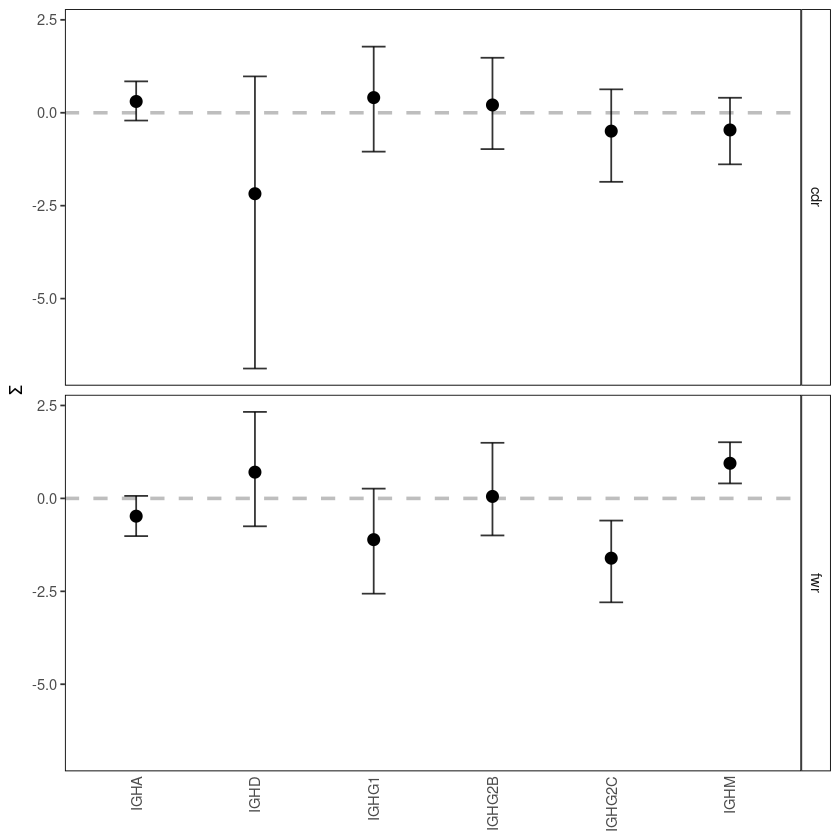

In [17]:
isotype_colors <- c("IGHM"="darkorchid", "IGHD"="firebrick", 
                    "IGHG"="seagreen", "IGHA"="steelblue")

# Plot mean and confidence interval by time-point
plotBaselineSummary(grouped_1, "c_call")

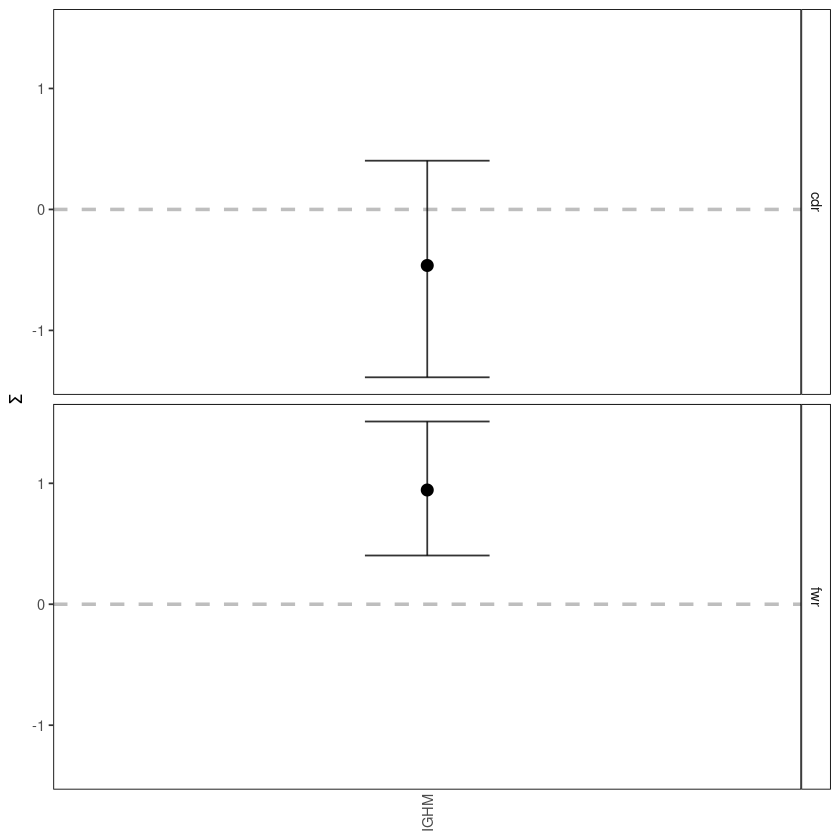

In [19]:
# Group by CDR/FWR and facet by isotype
plotBaselineSummary(grouped_2, "c_call")

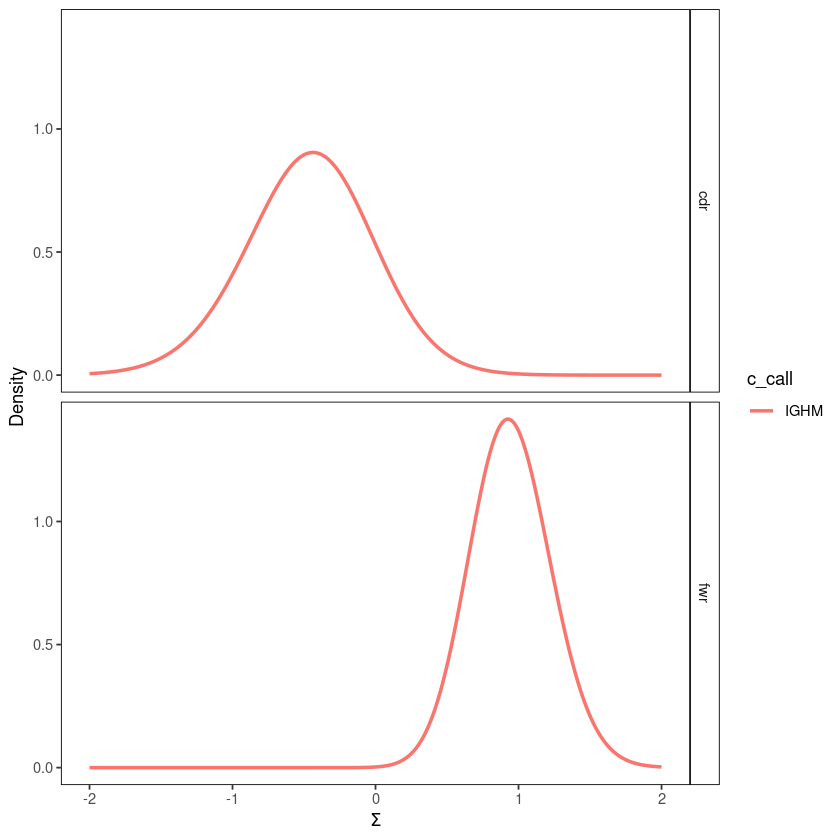

In [23]:
# Plot selection PDFs for a subset of the data
plotBaselineDensity(grouped_2, "c_call", groupColumn="c_call", colorElement="group", 
                    sigmaLimits=c(-2, 2))